### Walking & Health Notebook

#### Part I. Data Importation and Cleaning

In [1]:
import pandas as pd
import numpy as np


In [2]:
walkability = pd.read_csv("epa_walkability.csv")
health = pd.read_csv("places_health.csv")
relation = pd.read_csv("zcta_tract_relationship.txt", sep = "|")

/Users/emilymei/opt/anaconda3/envs/orie_3310/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
match = relation[["GEOID_ZCTA5_20", "GEOID_TRACT_20"]]
match = match.dropna()
match['GEOID_TRACT_20'] = match['GEOID_TRACT_20'] / 1.0

In [4]:
walkability["GEOID_TRACT_20"] = walkability["STATEFP"].astype(str).str.rjust(2,'0') + walkability["COUNTYFP"].astype(str).str.rjust(3,'0')+walkability["TRACTCE"].astype(str).str.rjust(6,'0')
walkability["GEOID_TRACT_20"] = walkability["GEOID_TRACT_20"].astype(float)

In [5]:
joined_walk = walkability.join(match.set_index("GEOID_TRACT_20"),on="GEOID_TRACT_20",lsuffix='_caller', rsuffix='_other')
walk_subset = joined_walk[['NatWalkInd', 'GEOID_ZCTA5_20']]
walk_subset = pd.DataFrame(walk_subset.groupby("GEOID_ZCTA5_20").mean())

In [6]:
data_joined = health.set_index("LocationName").join(walk_subset).reset_index()

In [7]:
data_joined

,index,Year,DataSource,Category,Measure,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,Geolocation,LocationID,CategoryID,MeasureId,DataValueTypeID,Short_Question_Text,NatWalkInd
0,1001,2020,BRFSS,Prevention,Current lack of health insurance among adults ...,%,Crude prevalence,6.2,NaN,NaN,5.5,7.0,16769,POINT (-72.62581515 42.06255509),1001,PREVENT,ACCESS2,CrdPrv,Health Insurance,9.355556
1,1001,2020,BRFSS,Health Outcomes,Cancer (excluding skin cancer) among adults ag...,%,Crude prevalence,8.4,NaN,NaN,8.1,8.7,16769,POINT (-72.62581515 42.06255509),1001,HLTHOUT,CANCER,CrdPrv,Cancer (except skin),9.355556
2,1001,2019,BRFSS,Prevention,Cholesterol screening among adults aged >=18 y...,%,Crude prevalence,91.8,NaN,NaN,91.2,92.4,16769,POINT (-72.62581515 42.06255509),1001,PREVENT,CHOLSCREEN,CrdPrv,Cholesterol Screening,9.355556
3,1001,2020,BRFSS,Health Status,Mental health not good for >=14 days among adu...,%,Crude prevalence,14.3,NaN,NaN,13.7,14.9,16769,POINT (-72.62581515 42.06255509),1001,HLTHSTAT,MHLTH,CrdPrv,Mental Health,9.355556
4,1001,2020,BRFSS,Health Outcomes,Obesity among adults aged >=18 years,%,Crude prevalence,27.9,NaN,NaN,27.1,28.7,16769,POINT (-72.62581515 42.06255509),1001,HLTHOUT,OBESITY,CrdPrv,Obesity,9.355556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969018,99929,2020,BRFSS,Prevention,Older adult women aged >=65 years who are up t...,%,Crude prevalence,30.8,NaN,NaN,24.8,37.5,2338,POINT (-131.6992663 56.36477625),99929,PREVENT,COREW,CrdPrv,Core preventive services for older women,6.166667
969019,99929,2020,BRFSS,Health Outcomes,Cancer (excluding skin cancer) among adults ag...,%,Crude prevalence,7.5,NaN,NaN,7.1,7.8,2338,POINT (-131.6992663 56.36477625),99929,HLTHOUT,CANCER,CrdPrv,Cancer (except skin),6.166667
969020,99929,2020,BRFSS,Prevention,Current lack of health insurance among adults ...,%,Crude prevalence,13.7,NaN,NaN,11.4,16.0,2338,POINT (-131.6992663 56.36477625),99929,PREVENT,ACCESS2,CrdPrv,Health Insurance,6.166667
969021,99929,2020,BRFSS,Health Status,Fair or poor self-rated health status among ad...,%,Crude prevalence,15.3,NaN,NaN,13.3,17.5,2338,POINT (-131.6992663 56.36477625),99929,HLTHSTAT,GHLTH,CrdPrv,General Health,6.166667


In [8]:
health_values = data_joined.pivot(index = "index", columns = "MeasureId", values = "Data_Value")
health_values = health_values.join(walk_subset).reset_index()

In [9]:
health_values

,index,ACCESS2,ARTHRITIS,BINGE,BPHIGH,BPMED,CANCER,CASTHMA,CERVICAL,CHD,...,KIDNEY,LPA,MAMMOUSE,MHLTH,OBESITY,PHLTH,SLEEP,STROKE,TEETHLOST,NatWalkInd
0,1001,6.2,29.5,15.9,32.6,77.9,8.4,10.8,85.6,7.0,...,3.1,20.3,82.1,14.3,27.9,9.3,33.5,3.2,13.3,9.355556
1,1002,6.7,17.8,17.5,21.1,64.2,4.5,11.4,73.5,4.3,...,2.2,17.5,79.6,16.5,20.9,7.6,30.1,2.1,12.4,10.600000
2,1003,8.8,5.4,19.8,9.9,17.7,0.6,14.8,46.7,1.1,...,1.1,19.7,77.5,25.5,19.7,7.1,33.1,0.7,NaN,12.384615
3,1005,5.9,27.2,17.9,29.1,74.9,7.0,10.6,86.2,5.7,...,2.5,20.8,82.2,14.0,29.9,8.7,32.5,2.5,12.1,5.875000
4,1007,5.2,22.7,17.8,24.9,71.1,6.4,10.1,85.4,4.7,...,2.2,15.3,79.1,13.2,22.9,7.5,30.0,2.1,9.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404,99923,9.6,26.0,18.0,36.4,72.1,8.4,8.3,81.8,6.6,...,2.7,17.9,65.8,9.8,28.0,9.0,27.3,2.8,8.3,1.833333
32405,99925,14.2,26.6,18.0,38.6,69.2,6.8,10.7,77.9,8.0,...,3.5,25.8,66.1,14.0,34.8,13.1,33.1,4.2,19.0,7.500000
32406,99926,15.4,24.0,19.4,37.0,64.9,5.6,11.8,77.2,7.6,...,3.5,27.9,63.8,16.3,37.5,14.0,36.1,4.5,24.3,6.000000
32407,99927,14.8,26.7,18.8,39.8,70.3,6.8,9.6,76.1,8.7,...,3.5,25.1,63.1,12.5,33.9,12.9,31.5,4.1,18.5,4.444444


In [10]:
health_values = health_values[["index", "ACCESS2", "CANCER", "ARTHRITIS", "COPD", "CHD", "OBESITY", "BPHIGH", "MHLTH", "PHLTH", "LPA", "NatWalkInd"]]

health_values

,index,ACCESS2,CANCER,ARTHRITIS,COPD,CHD,OBESITY,BPHIGH,MHLTH,PHLTH,LPA,NatWalkInd
0,1001,6.2,8.4,29.5,6.4,7.0,27.9,32.6,14.3,9.3,20.3,9.355556
1,1002,6.7,4.5,17.8,4.6,4.3,20.9,21.1,16.5,7.6,17.5,10.600000
2,1003,8.8,0.6,5.4,3.0,1.1,19.7,9.9,25.5,7.1,19.7,12.384615
3,1005,5.9,7.0,27.2,5.7,5.7,29.9,29.1,14.0,8.7,20.8,5.875000
4,1007,5.2,6.4,22.7,4.7,4.7,22.9,24.9,13.2,7.5,15.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
32404,99923,9.6,8.4,26.0,5.8,6.6,28.0,36.4,9.8,9.0,17.9,1.833333
32405,99925,14.2,6.8,26.6,8.2,8.0,34.8,38.6,14.0,13.1,25.8,7.500000
32406,99926,15.4,5.6,24.0,8.0,7.6,37.5,37.0,16.3,14.0,27.9,6.000000
32407,99927,14.8,6.8,26.7,8.6,8.7,33.9,39.8,12.5,12.9,25.1,4.444444


In [11]:
health_values = health_values.dropna()

In [12]:
health_values

,index,ACCESS2,CANCER,ARTHRITIS,COPD,CHD,OBESITY,BPHIGH,MHLTH,PHLTH,LPA,NatWalkInd
0,1001,6.2,8.4,29.5,6.4,7.0,27.9,32.6,14.3,9.3,20.3,9.355556
1,1002,6.7,4.5,17.8,4.6,4.3,20.9,21.1,16.5,7.6,17.5,10.600000
2,1003,8.8,0.6,5.4,3.0,1.1,19.7,9.9,25.5,7.1,19.7,12.384615
3,1005,5.9,7.0,27.2,5.7,5.7,29.9,29.1,14.0,8.7,20.8,5.875000
5,1008,5.8,7.1,27.5,6.1,6.2,29.2,31.1,14.7,9.2,19.1,5.555556
...,...,...,...,...,...,...,...,...,...,...,...,...
32404,99923,9.6,8.4,26.0,5.8,6.6,28.0,36.4,9.8,9.0,17.9,1.833333
32405,99925,14.2,6.8,26.6,8.2,8.0,34.8,38.6,14.0,13.1,25.8,7.500000
32406,99926,15.4,5.6,24.0,8.0,7.6,37.5,37.0,16.3,14.0,27.9,6.000000
32407,99927,14.8,6.8,26.7,8.6,8.7,33.9,39.8,12.5,12.9,25.1,4.444444


In [13]:
# constants for health values

OB_AVERAGE = 41.9 
CANCER_AVERAGE = 5.42
ACCESS_AVERAGE = 8.6 
MHLTH_AVERAGE = 20.1 
LPA_AVERAGE = 25.0 
ARTH_AVERAGE = 24.0 
COPD_AVERAGE = 6.4 
CHD_AVERAGE = 5.5
BHPHIGH_AVERAGE = 47
PHLTH_AVERAGE = 21.2 


### Linear Regression Models

In [43]:
from sklearn import linear_model
import matplotlib.pyplot as plt

In [15]:
# National averages
testdata = np.array([ACCESS_AVERAGE,CANCER_AVERAGE,ARTH_AVERAGE,COPD_AVERAGE,CHD_AVERAGE,OB_AVERAGE,BHPHIGH_AVERAGE,MHLTH_AVERAGE,PHLTH_AVERAGE,LPA_AVERAGE])

#### Regression Model fitted on all health data

In [16]:
regX = health_values[["ACCESS2", "CANCER", "ARTHRITIS", "COPD", "CHD", "OBESITY", "BPHIGH", "MHLTH", "PHLTH", "LPA"]]
regY = health_values[["NatWalkInd"]]
reg = linear_model.LinearRegression().fit(regX,regY)

In [18]:
reg.predict(testdata.reshape(1,-1))

/Users/emilymei/opt/anaconda3/envs/orie_3310/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[10.82867736]])

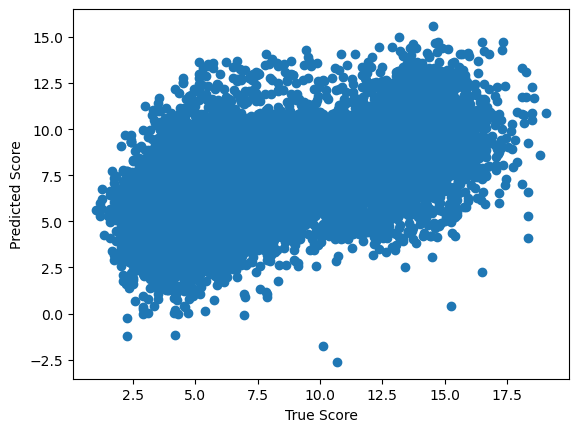

In [50]:
full_preds = reg.predict(regX)
plt.scatter(regY,full_preds)
plt.xlabel("True Score")
plt.ylabel("Predicted Score")
plt.show()

In [70]:
def plot_helper(lst,predictor,xs,regY=regY):
    for feature in lst:
        hmin = xs.min()[0]
        hmax = xs.max()[0]
        xlab = np.arange(hmin,hmax).reshape(-1,1)
        preds = predictor.predict(xlab)
        plt.scatter(xs,regY)
        plt.plot(xlab,preds,c='r')
        plt.xlabel(feature)
        plt.ylabel("Walkability Score")
        plt.show()

#### Regression Model fitted on preventative health data

In [19]:
regXprev = regX[["ACCESS2"]]
regprev = linear_model.LinearRegression().fit(regXprev, regY)

In [20]:
regprev.predict(testdata[0].reshape(1,-1))

/Users/emilymei/opt/anaconda3/envs/orie_3310/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[6.44471113]])

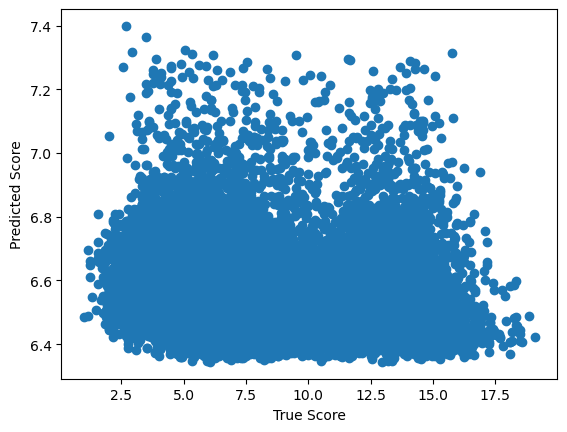

In [52]:
prev_preds = regprev.predict(regXprev)
plt.scatter(regY,prev_preds)
plt.xlabel("True Score")
plt.ylabel("Predicted Score")
plt.show()

/Users/emilymei/opt/anaconda3/envs/orie_3310/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


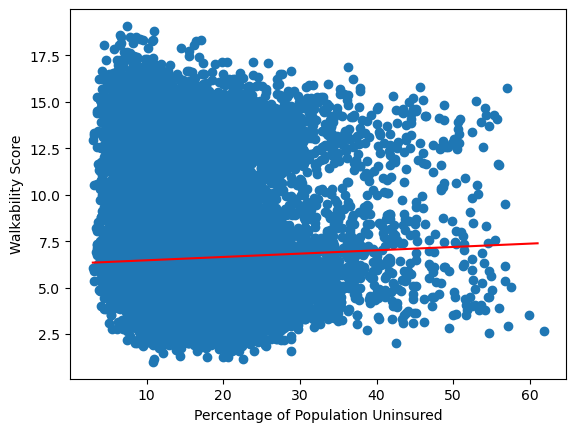

In [75]:
prev_xs = np.arange(regXprev.min()[0],regXprev.max()[0],1).reshape(-1,1)
prev_preds1 = regprev.predict(prev_xs)
plt.scatter(regXprev,regY)
plt.plot(prev_xs,prev_preds1,c='r')
plt.xlabel("Percentage of Population Uninsured")
plt.ylabel("Walkability Score")
plt.show()

#### Regression Model fitted on health outcome data

In [21]:
regXho = regX[["CANCER", "ARTHRITIS", "COPD", "CHD", "OBESITY", "BPHIGH"]]
regho = linear_model.LinearRegression().fit(regXho, regY)

In [22]:
regho.predict(testdata[1:7].reshape(1,-1))

/Users/emilymei/opt/anaconda3/envs/orie_3310/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[7.47589706]])

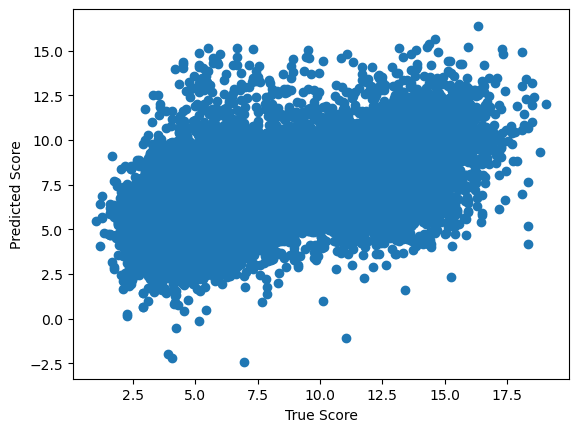

In [54]:
ho_preds = regho.predict(regXho)
plt.scatter(regY,ho_preds)
plt.xlabel("True Score")
plt.ylabel("Predicted Score")
plt.show()

In [113]:
# cancer = np.arange(regXho["CANCER"].min()[0],regXho["CANCER"].max()[0],0.5).reshape(-1,1)
# arth = np.arange(regXho["ARTHRITIS"].min()[0],regXho["ARTHRITIS"].max()[0]).reshape(-1,1)
# copd = np.arange(regXho["COPD"].min()[0],regXho["COPD"].max()[0]).reshape(-1,1)
# chd = np.arange(regXho["CHD"].min()[0],regXho["CHD"].max()[0]).reshape(-1,1)
# upper limit
ulim = max([regXho[elt].max() for elt in ["CANCER", "ARTHRITIS", "COPD", "CHD", "OBESITY", "BPHIGH"]])
# bottom limit
blim = min([regXho[elt].min() for elt in ["CANCER", "ARTHRITIS", "COPD", "CHD", "OBESITY", "BPHIGH"]])
ho_xs = np.arange(blim, ulim).reshape(-1,1)
ho_xs = np.tile(ho_xs, (1,6))
ho_preds = regho.predict(ho_xs)

/Users/emilymei/opt/anaconda3/envs/orie_3310/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


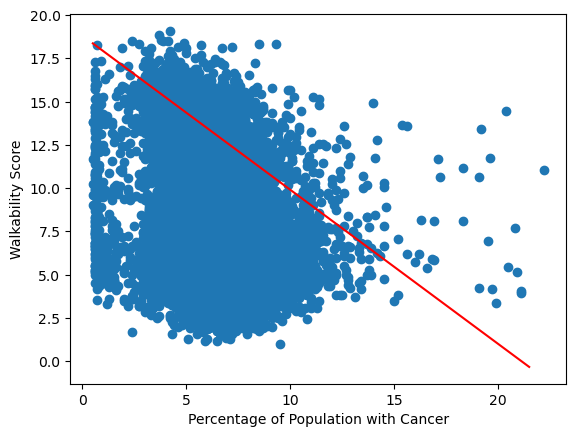

In [106]:
plt.scatter(regXho["CANCER"],regY)
ho_graph_xs = np.arange(regXho["CANCER"].min(),regXho["CANCER"].max(),1).reshape(-1,1)
plt.plot(ho_graph_xs,ho_preds[:ho_graph_xs.shape[0]],c='r')
plt.xlabel("Percentage of Population with Cancer")
plt.ylabel("Walkability Score")
plt.show()

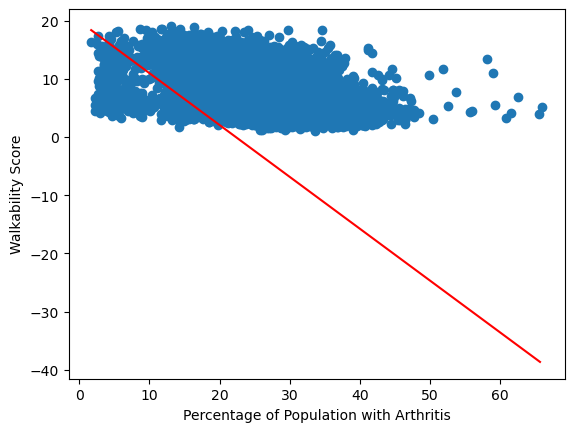

In [107]:
plt.scatter(regXho["ARTHRITIS"],regY)
ho_graph_xs = np.arange(regXho["ARTHRITIS"].min(),regXho["ARTHRITIS"].max(),1).reshape(-1,1)
plt.plot(ho_graph_xs,ho_preds[:ho_graph_xs.shape[0]],c='r')
plt.xlabel("Percentage of Population with Arthritis")
plt.ylabel("Walkability Score")
plt.show()

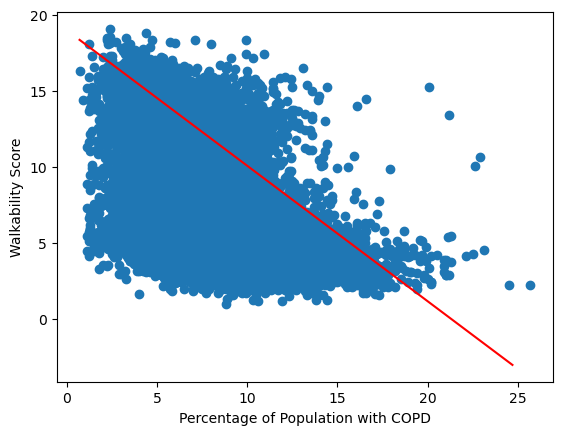

In [108]:
plt.scatter(regXho["COPD"],regY)
ho_graph_xs = np.arange(regXho["COPD"].min(),regXho["COPD"].max(),1).reshape(-1,1)
plt.plot(ho_graph_xs,ho_preds[:ho_graph_xs.shape[0]],c='r')
plt.xlabel("Percentage of Population with COPD")
plt.ylabel("Walkability Score")
plt.show()

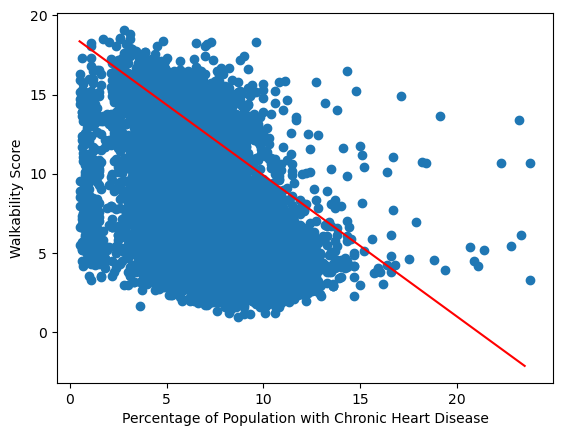

In [109]:
plt.scatter(regXho["CHD"],regY)
ho_graph_xs = np.arange(regXho["CHD"].min(),regXho["CHD"].max(),1).reshape(-1,1)
plt.plot(ho_graph_xs,ho_preds[:ho_graph_xs.shape[0]],c='r')
plt.xlabel("Percentage of Population with Chronic Heart Disease")
plt.ylabel("Walkability Score")
plt.show()

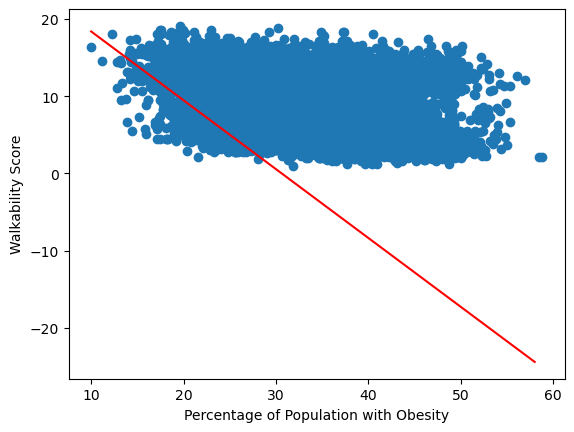

In [110]:
plt.scatter(regXho["OBESITY"],regY)
ho_graph_xs = np.arange(regXho["OBESITY"].min(),regXho["OBESITY"].max(),1).reshape(-1,1)
plt.plot(ho_graph_xs,ho_preds[:ho_graph_xs.shape[0]],c='r')
plt.xlabel("Percentage of Population with Obesity")
plt.ylabel("Walkability Score")
plt.show()

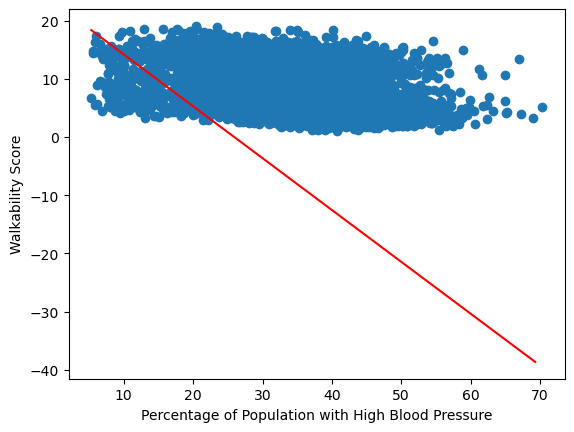

In [111]:
plt.scatter(regXho["BPHIGH"],regY)
ho_graph_xs = np.arange(regXho["BPHIGH"].min(),regXho["BPHIGH"].max(),1).reshape(-1,1)
plt.plot(ho_graph_xs,ho_preds[:ho_graph_xs.shape[0]],c='r')
plt.xlabel("Percentage of Population with High Blood Pressure")
plt.ylabel("Walkability Score")
plt.show()

#### Regression Model fitted on health stats/risk behavior data

In [23]:
regXhsrb = regX[["MHLTH", "PHLTH", "LPA"]]
reghsrb = linear_model.LinearRegression().fit(regXhsrb, regY)

In [24]:
reghsrb.predict(testdata[7:].reshape(1,-1))

/Users/emilymei/opt/anaconda3/envs/orie_3310/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[1.6669646]])

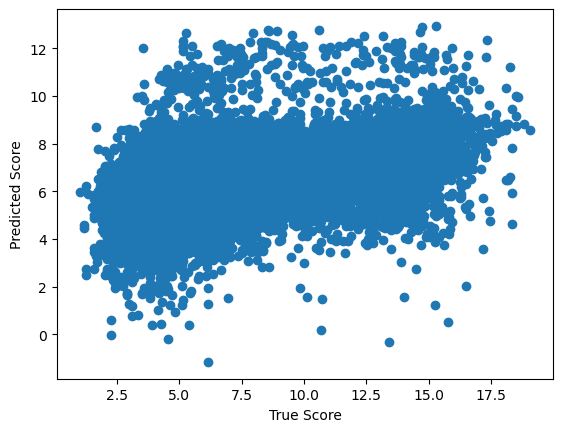

In [55]:
hsrb_preds = reghsrb.predict(regXhsrb)
plt.scatter(regY,hsrb_preds)
plt.xlabel("True Score")
plt.ylabel("Predicted Score")
plt.show()

#### Train/Test split model

In [127]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(regX, regY)

In [129]:
train_model = linear_model.LinearRegression().fit(trainX, trainY)

In [130]:
model_preds = train_model.predict(testX)

In [135]:
# R squared value
train_model.score(testX,testY)

0.3384843112655813

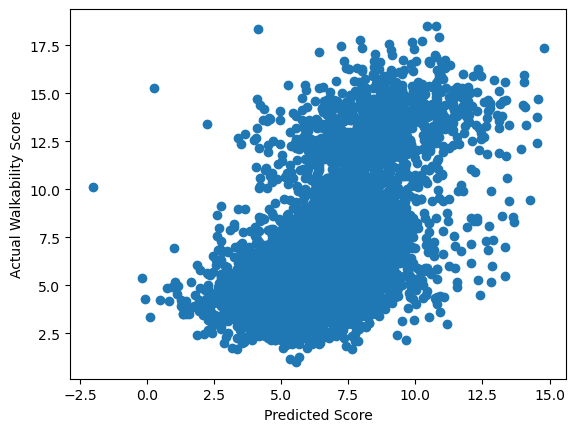

In [134]:
plt.scatter(model_preds,testY)
plt.xlabel("Predicted Score")
plt.ylabel("Actual Walkability Score")
plt.show()

In [136]:
from sklearn.metrics import mean_squared_error

In [137]:
# MSE of full regression model
mean_squared_error(testY,model_preds)

6.6032523519770905